In [1]:
%reload_ext autoreload
%autoreload 2

from dataset.graph_builder import GraphBuilder

builder = GraphBuilder(dataset_paths=["data/MOLWENI/dev2.json", "data/STAC/test2.json"], dataset_names=["MOLWENI", "STAC"], dataset_type='dev')
builder()

2025-02-08 11:47:31,172 - INFO - Loading dataset from data/MOLWENI/dev2.json
2025-02-08 11:47:31,173 - INFO - MOLWENI dataset loaded successfully.
2025-02-08 11:47:31,173 - INFO - Loading dataset from data/STAC/test2.json
2025-02-08 11:47:31,174 - INFO - STAC dataset loaded successfully.
2025-02-08 11:47:31,195 - INFO - Use pytorch device_name: mps
2025-02-08 11:47:31,195 - INFO - Load pretrained SentenceTransformer: Alibaba-NLP/gte-modernbert-base
2025-02-08 11:47:36,060 - INFO - Load pretrained sentiment analysis model: finiteautomata/bertweet-base-sentiment-analysis.
emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use mps:0
2025-02-08 11:47:37,083 - INFO - Starting graph construction for dataset/s ['MOLWENI', 'STAC']...
Processing dialogs:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processing dialogs:  50%|█████     | 1/2 [00:01<00:01,  1.59s/it]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processing dialogs: 100%|██████████| 2/2 [00:02<00:00,  1.41s/it]
2025-02-08 11:47:39,897 - INFO - Graph construction completed successfully.


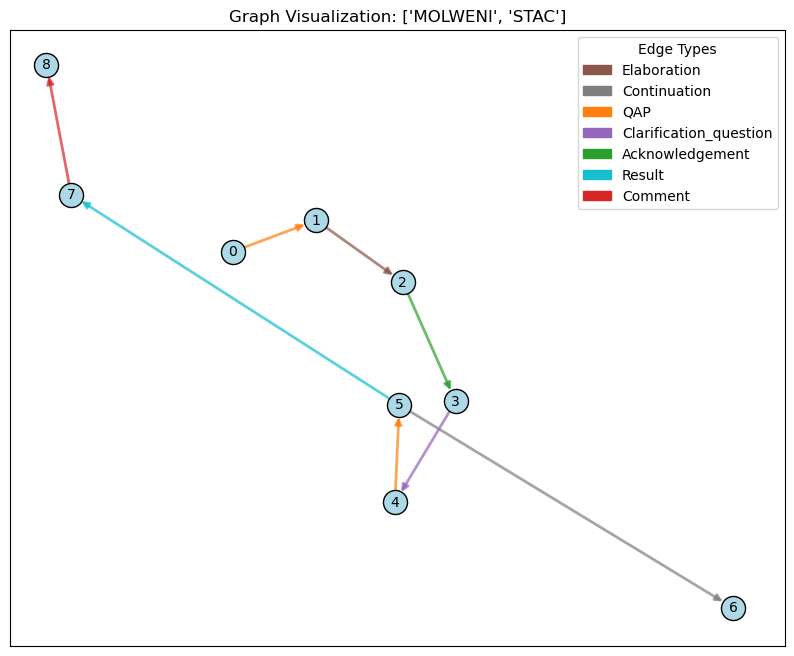

In [2]:
builder.display_graph(0)

In [3]:
builder.save_graphs('data/UNIFIED/', None)

2025-02-08 11:47:45,380 - INFO - Saving graphs to data/UNIFIED/dev
2025-02-08 11:47:45,382 - INFO - Graphs saved successfully.


In [6]:
import os 

os.path.isdir('data/UNIFIED')

False

In [5]:
import torch 

x = torch.load(os.path.join('data/UNIFIED/dev', '0.pt'))
x 

HeteroData(
  edu={ x=[9, 2304] },
  (edu, QAP, edu)={ edge_index=[2, 2] },
  (edu, Elaboration, edu)={ edge_index=[2, 1] },
  (edu, Acknowledgement, edu)={ edge_index=[2, 1] },
  (edu, Clarification_question, edu)={ edge_index=[2, 1] },
  (edu, Continuation, edu)={ edge_index=[2, 1] },
  (edu, Result, edu)={ edge_index=[2, 1] },
  (edu, Comment, edu)={ edge_index=[2, 1] }
)

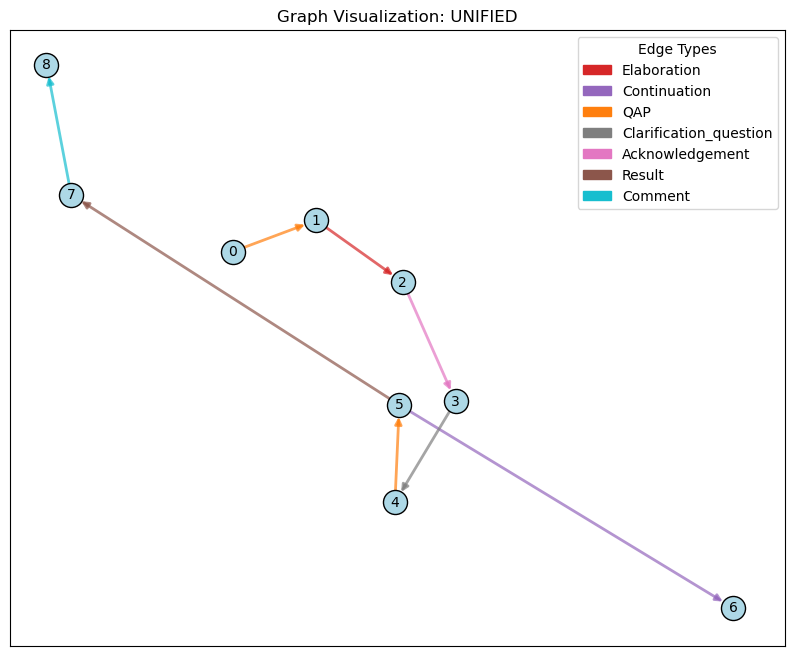

In [7]:
import random

import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import networkx as nx
from matplotlib import pyplot as plt
from torch_geometric.utils.convert import to_networkx

G = to_networkx(x)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(
    G, seed=42
)  # Layout for consistent visualization

# Get unique edge types
edge_types = set(
    data["type"][1] for _, _, data in G.edges(data=True)
)
colors = list(mcolors.TABLEAU_COLORS.values())
random.shuffle(colors)  # Shuffle to assign unique colors
color_map = {
    etype: colors[i % len(colors)]
    for i, etype in enumerate(edge_types)
}

# Draw edges with unique colors based on relation type
legend_handles = []
for edge_type in edge_types:
    edges = [
        (u, v)
        for u, v, data in G.edges(data=True)
        if data["type"][1] == edge_type
    ]
    nx.draw_networkx_edges(
        G,
        pos,
        edgelist=edges,
        edge_color=color_map[edge_type],
        width=2,
        alpha=0.7,
        label=edge_type,
    )
    legend_handles.append(
        mpatches.Patch(color=color_map[edge_type], label=edge_type)
    )

# Draw nodes
nx.draw_networkx_nodes(
    G,
    pos,
    node_size=300,
    node_color="lightblue",
    edgecolors="black",
)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

plt.legend(
    handles=legend_handles,
    title="Edge Types",
    loc="upper right",
    bbox_to_anchor=(1, 1),
)
plt.title(f"Graph Visualization: UNIFIED")
plt.show()